# Explore here

Tutorial K-Medias
     
     Objetivo: Clasificar casas de California según su la región en la que se encuentren y del ingreso medio.

In [45]:
!pip install missingno lazypredict
!pip install pandas sqlite3

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [46]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, confusion_matrix
import joblib

In [47]:
# Descargo los datos base datos "housing":

# Leo los datos de la URL.
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"

# Guardo los datos en un DataFrame. La BD tiene 20640 filas y 9 columnas.
df = pd.read_csv(url)

# Miro las variables de la bd.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [48]:
# Me quedo con las variables Latitude, Longitude y MedInc
df = df[['Latitude', 'Longitude', 'MedInc']]

2. Construye un K-Means.

In [49]:
# Escalo los datos de las variables.
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Latitude', 'Longitude', 'MedInc']])

# Modelo K-Means con 6 clusters.
kmeans = KMeans(n_clusters=6, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   20640 non-null  float64
 1   Longitude  20640 non-null  float64
 2   MedInc     20640 non-null  float64
 3   cluster    20640 non-null  int32  
dtypes: float64(3), int32(1)
memory usage: 564.5 KB


In [51]:
print(df['cluster'].unique())

[1 4 3 2 5 0]


La variable "cluster" toma los valores 0, 1, 2, 3, 4 y 5. Por tanto, es una variable de tipo entero (int32).

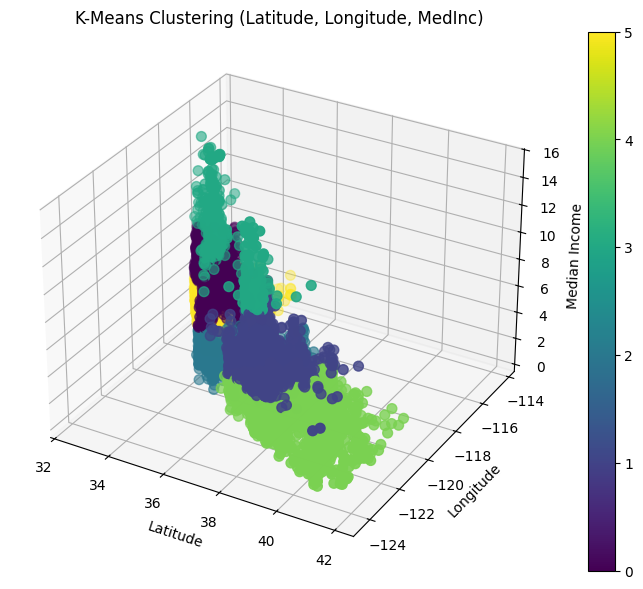

In [52]:
# Gráfico de clusters.
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Grafico los puntos, coloreándolos según su cluster.
scatter = ax.scatter(df['Latitude'], df['Longitude'], df['MedInc'], c=df['cluster'], cmap='viridis', s=50)

ax.set_title('K-Means Clustering (Latitude, Longitude, MedInc)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Median Income')

fig.colorbar(scatter)

plt.show()

3. Predecir el conjunto.

In [53]:
# Divido el df en train y test.
X = df.drop(columns=['cluster'])
y = df['cluster']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

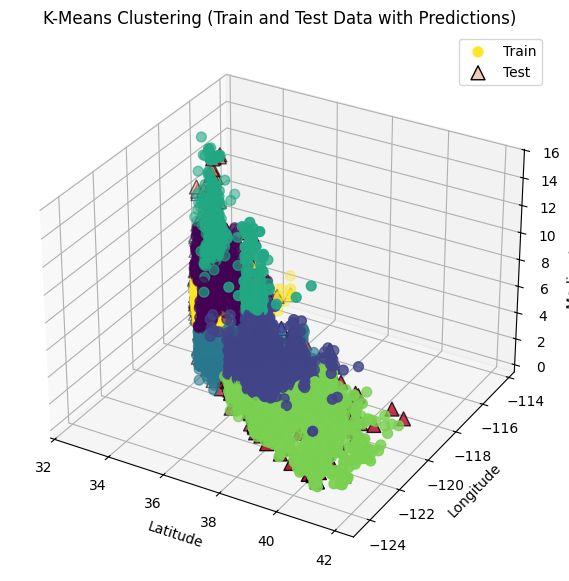

In [54]:
# Modelo K-Means 6 clusters.
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_train)

# Predecir los clusters en los datos de prueba.
y_pred_test = kmeans.predict(X_test)

# Añado la variable y_pred_test al conjunto de prueba.
X_test['predicted_cluster'] = y_pred_test

# Gráfico 3D para visualizar los clusters en el conjunto de entrenamiento y prueba.
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Añado los puntos de entrenamiento.
scatter_train = ax.scatter(X_train['Latitude'], X_train['Longitude'], X_train['MedInc'], c=y_train, cmap='viridis', s=50, label='Train')

# Añado los puntos de prueba con las predicciones del modelo
scatter_test = ax.scatter(X_test['Latitude'], X_test['Longitude'], X_test['MedInc'], c=X_test['predicted_cluster'], cmap='coolwarm', s=100, edgecolor='k', marker='^', label='Test')

ax.set_title('K-Means Clustering (Train and Test Data with Predictions)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Median Income')

ax.legend()

plt.show()

En primer lugar, he realizado un modelo de cluster siguiendo la metodología KMeans para agrupar los hogares de california según la ubicación y la renta media. 

En segundo lugar, he entrenado el modelo para, posteriormtente, hacer predicciones sobre el conjunto de prueba. El gráfico muestra, a priori, que los resultados obtenidos en el modelo de prueba (triángulos) se ajustan bastante bien al conjunto de entrenamiento (círculos).

4. Entrena un modelo de clasificación supervisada.

In [55]:
# Divido el df en train y test.
X = df.drop(columns=['cluster'])  
y = df['cluster'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalo los datos de las variables.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo de Random Forest (modelo escogido para realizar el modelo de clasificación supervisada).
rf_model = RandomForestClassifier(random_state=42)

# Entreno el modelo con los datos de entrenamiento.
rf_model.fit(X_train_scaled, y_train)

# Realizo predicciones en los datos de prueba.
y_pred_test = rf_model.predict(X_test_scaled)

In [56]:
# Obtengo las métricas
def get_metrics(y_train, y_test, y_pred_train, y_pred_test, y_proba_train, y_proba_test):
    # Calculo las métricas para el conjunto de entrenamiento.
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train, average='weighted')  
    train_auc = roc_auc_score(y_train, y_proba_train, multi_class='ovr')  
    train_precision = precision_score(y_train, y_pred_train, average='weighted')
    train_recall = recall_score(y_train, y_pred_train, average='weighted')
    train_specificity = specificity_score(y_train, y_pred_train)

    # Calculo las métricas para el conjunto de prueba.
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')
    test_auc = roc_auc_score(y_test, y_proba_test, multi_class='ovr')
    test_precision = precision_score(y_test, y_pred_test, average='weighted')
    test_recall = recall_score(y_test, y_pred_test, average='weighted')
    test_specificity = specificity_score(y_test, y_pred_test)

    # Calculo la diferencia entre métricas de entrenamiento y prueba.
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Creo un DataFrame con los resultados
    metrics_df = pd.DataFrame(
        [[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],
         [test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],
         [diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
        columns=['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
        index=['Train', 'Test', 'Diferencia']
    )
    return metrics_df

In [57]:
# Obtener las métricas
metrics_df = get_metrics(y_train, y_test, y_pred_train, y_pred_test, y_proba_train, y_proba_test)
print(metrics_df)

            Accuracy        F1       AUC  Precision    Recall  Specificity
Train       1.000000  1.000000  1.000000   1.000000  1.000000          1.0
Test        0.995155  0.995154  0.999971   0.995156  0.995155          1.0
Diferencia  0.004845  0.004846  0.000029   0.004844  0.004845          0.0


El modelo de clasificación supervisada escogido para este análisis, tomando como referencia en anterior modelo de KMeans, ha sido un modelo Random Forest.

Los resultados muestran que el rendimiento del modelo es muy elevado tanto en el conjunto de entrenamiento como de prueba. De hecho, las mínimas diferencias en las métricas entre ambos conjuntos de datos evidencian que el modelo generaliza muy bien sobre el conjunto de prueba.

Cabe destacar que, tanto en el conjunto de entrenamiento como de prueba, la especificidad (Specificity), que es la proporción de verdaderos negativos entre todas las instancias que realmente son negativas, es perfecta. Es decir, el modelo identifica muy bien las clases negativas, minimizando los falsos positivos.

In [58]:
# Guardo los modelos en la carpeta "models".
carpeta_modelos = '/workspaces/Proyecto22_albaebauluz/models'

# Defino los nombres de los archivos para cada modelo.
modelo_rf = f'{carpeta_modelos}/modelo_rf.pkl'
modelo_kmeans = f'{carpeta_modelos}/modelo_kmeans.pkl'

# Guardo los modelos Random Forest y KMeans.
joblib.dump(rf_model, modelo_rf)
joblib.dump(kmeans, modelo_kmeans)

print(f"Modelos guardados en {carpeta_modelos}")

Modelos guardados en /workspaces/Proyecto22_albaebauluz/models
